In [1]:
import xgboost as xgb
from scipy import stats
from BookX import getBookDataset
from sklearn.model_selection import GridSearchCV
from itertools import chain

In [2]:
train, test = getBookDataset('../Data_Train.xlsx', '../Data_Test.xlsx', transforms=False)
train.head()

,Genre,BookCategory,Reviews,Ratings,Edition,author_0,author_1,author_2,author_3,author_4,Price
0,2,1,4.0,8.0,0,0,1,1,1,1,220.00
1,50,3,3.9,14.0,0,43,1,1,1,1,202.93
2,126,7,4.8,6.0,0,0,1,1,1,1,299.00
3,64,6,4.1,13.0,0,12,1,1,1,1,180.00
4,157,2,5.0,1.0,1,0,1,1,1,1,965.62


In [3]:
param_grid = {
    'colsample_bytree': [1., .5, .7, .3, .1],
    'n_estimators': [50],
    'max_depth': [7, 10, 15, 20],
}

model = xgb.XGBRegressor()
searcher = GridSearchCV(param_grid=param_grid, estimator=model,
            scoring='neg_mean_squared_error', cv=4, verbose=1, n_jobs=-1)


# Fit grid_mse to the data
X, y = train.iloc[:, :-1], train.iloc[:,-1].apply(lambda x: np.log(x+ 1))
searcher.fit(X, y)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", searcher.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(searcher.best_score_)))

Fitting 4 folds for each of 20 candidates, totalling 80 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   21.8s finished
Best parameters found:  {'colsample_bytree': 0.1, 'max_depth': 15, 'n_estimators': 50}
Lowest RMSE found:  0.6115099735003741


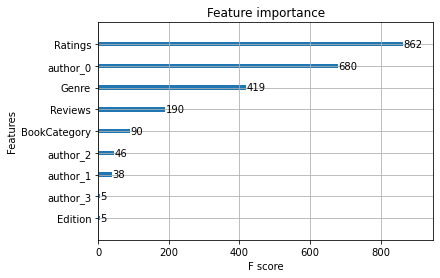

In [4]:
xgb.plot_importance(searcher.best_estimator_);

In [5]:
preds = searcher.predict(X)
err = (preds - y)**2
print("RMSE", err.mean() ** .5) #0.2214375717780346

RMSE 0.5612272915598785


In [6]:
filename = 'xgboost_gridcv.xlsx'
preds = searcher.predict(test)
preds = np.exp(preds) - 1
submission = pd.DataFrame({'Price': preds})
submission.to_excel(filename, index=False)
print("Saved file to", filename, 'with shape', submission.shape)

Saved file to xgboost_gridcv.xlsx with shape (1560, 1)
